In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("Already exists")
else:
  print("Download helper_functions.py")
  request = requests.get(f"https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

Download helper_functions.py


In [ ]:
import torch
import torchvision
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import helper_functions
from torchvision import transforms
from sklearn.model_selection import train_test_split
from PIL import Image

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
import requests
import zipfile
import io
from pathlib import Path

In [ ]:
levit_metrics = pd.read_json("/content/drive/MyDrive/Mini prj HiRise/Models/Metrics/levit_metrics.json", orient="index")
levit_metrics

,eval_loss,eval_accuracy,eval_precision,eval_recall,eval_f1,eval_confusion_matrix,eval_class_balanced_accuracy,eval_kappa,eval_ROC_AUC,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch,Model_Name
Model_1_Metrics,1.713116,0.671883,0.684748,0.671883,0.66777,"[[82, 25, 21, 17, 2, 7, 20, 13], [52, 165, 20,...",0.627299,0.619597,NaN,1.7412,1137.722,9.189,5,LeViT-HiRise


In [ ]:
beit_metrics = pd.read_json("/content/drive/MyDrive/Mini prj HiRise/Models/Metrics/beit_metrics.json", orient="index")
beit_metrics

,eval_loss,eval_accuracy,eval_precision,eval_recall,eval_f1,eval_confusion_matrix,eval_class_balanced_accuracy,eval_kappa,eval_ROC_AUC,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch,Model_Name
Model_2_Metrics,0.13902,0.959616,0.959491,0.959616,0.958974,"[[152, 20, 0, 11, 0, 2, 0, 2], [8, 347, 0, 1, ...",0.942785,0.952801,NaN,12.942,153.068,1.236,5,BeiT-HiRise


In [ ]:
vit_metrics = pd.read_json("/content/drive/MyDrive/Mini prj HiRise/Models/Metrics/vit_metrics.json", orient="index")
vit_metrics

,eval_loss,eval_accuracy,eval_precision,eval_recall,eval_f1,eval_confusion_matrix,eval_class_balanced_accuracy,eval_kappa,eval_ROC_AUC,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch,Model_Name
Model_3_Metrics,0.092956,0.977789,0.977732,0.977789,0.977497,"[[164, 12, 0, 8, 0, 0, 1, 2], [6, 350, 0, 0, 0...",0.967395,0.974051,NaN,13.2287,149.751,1.209,5,ViT-HiRise


In [ ]:
deit_metrics = pd.read_json("/content/drive/MyDrive/Mini prj HiRise/Models/Metrics/deit_metrics.json", orient="index")
deit_metrics

,eval_loss,eval_accuracy,eval_precision,eval_recall,eval_f1,eval_confusion_matrix,eval_class_balanced_accuracy,eval_kappa,eval_ROC_AUC,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch,Model_Name
Model_4_Metrics,0.083082,0.980818,0.980617,0.980818,0.980455,"[[161, 11, 0, 10, 0, 0, 3, 2], [3, 353, 0, 0, ...",0.972153,0.977587,NaN,14.4619,136.98,1.106,5,DeiT-HiRise


In [ ]:
swin_metrics = pd.read_json("/content/drive/MyDrive/Mini prj HiRise/Models/Metrics/swin_metrics.json", orient="index")
swin_metrics

,eval_loss,eval_accuracy,eval_precision,eval_recall,eval_f1,eval_confusion_matrix,eval_class_balanced_accuracy,eval_kappa,eval_ROC_AUC,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch,Model_Name
Model_5_Metrics,0.115347,0.968198,0.968008,0.968198,0.967742,"[[163, 11, 0, 8, 0, 2, 2, 1], [4, 352, 0, 0, 0...",0.950861,0.962844,NaN,7.8852,251.229,2.029,5,SwinV2-HiRise


In [ ]:
model_metrics = pd.concat([levit_metrics, beit_metrics, vit_metrics, deit_metrics, swin_metrics])
model_metrics

,eval_loss,eval_accuracy,eval_precision,eval_recall,eval_f1,eval_confusion_matrix,eval_class_balanced_accuracy,eval_kappa,eval_ROC_AUC,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch,Model_Name
Model_1_Metrics,1.713116,0.671883,0.684748,0.671883,0.667770,"[[82, 25, 21, 17, 2, 7, 20, 13], [52, 165, 20,...",0.627299,0.619597,NaN,1.7412,1137.722,9.189,5,LeViT-HiRise
Model_2_Metrics,0.139020,0.959616,0.959491,0.959616,0.958974,"[[152, 20, 0, 11, 0, 2, 0, 2], [8, 347, 0, 1, ...",0.942785,0.952801,NaN,12.9420,153.068,1.236,5,BeiT-HiRise
Model_3_Metrics,0.092956,0.977789,0.977732,0.977789,0.977497,"[[164, 12, 0, 8, 0, 0, 1, 2], [6, 350, 0, 0, 0...",0.967395,0.974051,NaN,13.2287,149.751,1.209,5,ViT-HiRise
Model_4_Metrics,0.083082,0.980818,0.980617,0.980818,0.980455,"[[161, 11, 0, 10, 0, 0, 3, 2], [3, 353, 0, 0, ...",0.972153,0.977587,NaN,14.4619,136.980,1.106,5,DeiT-HiRise
Model_5_Metrics,0.115347,0.968198,0.968008,0.968198,0.967742,"[[163, 11, 0, 8, 0, 2, 2, 1], [4, 352, 0, 0, 0...",0.950861,0.962844,NaN,7.8852,251.229,2.029,5,SwinV2-HiRise


In [ ]:
Model_Name = model_metrics.loc[:,"Model_Name"].to_list()
Model_Name

['LeViT-HiRise', 'BeiT-HiRise', 'ViT-HiRise', 'DeiT-HiRise', 'SwinV2-HiRise']

# Confusion Matrix

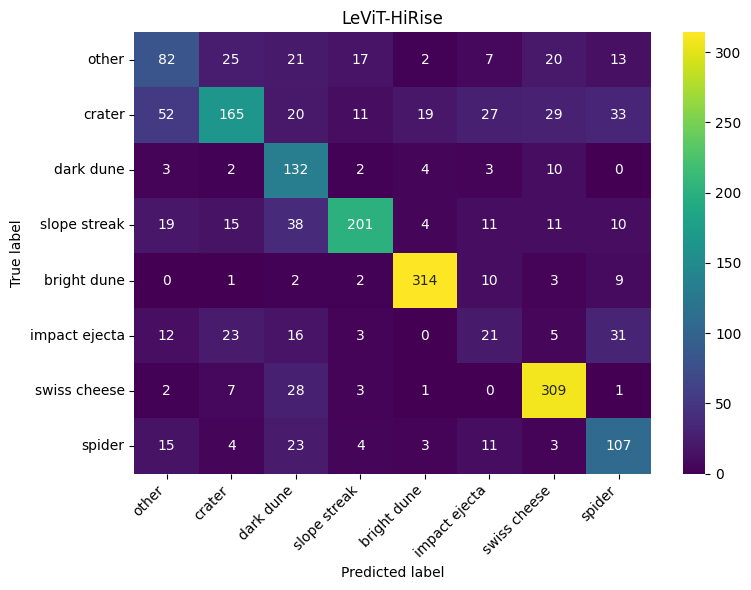

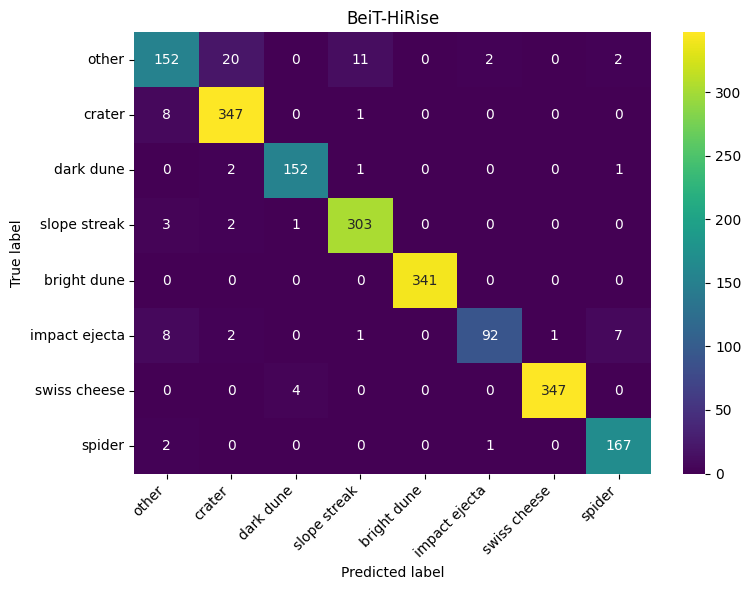

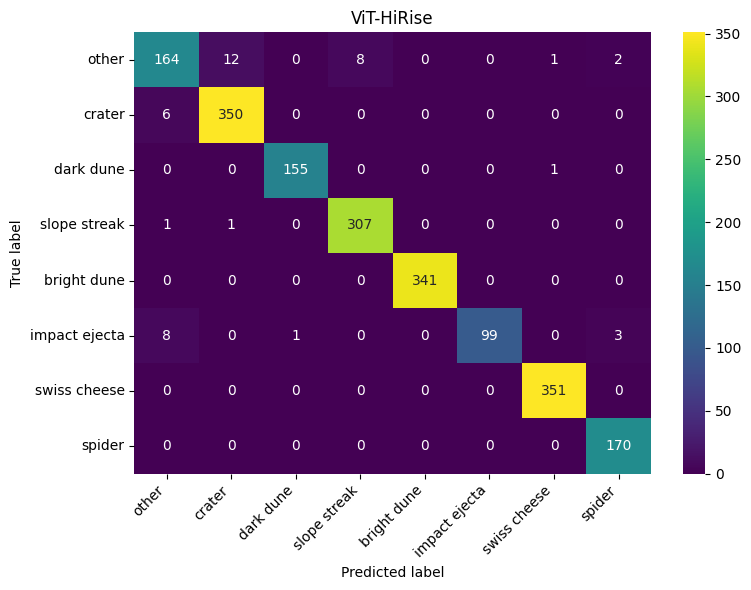

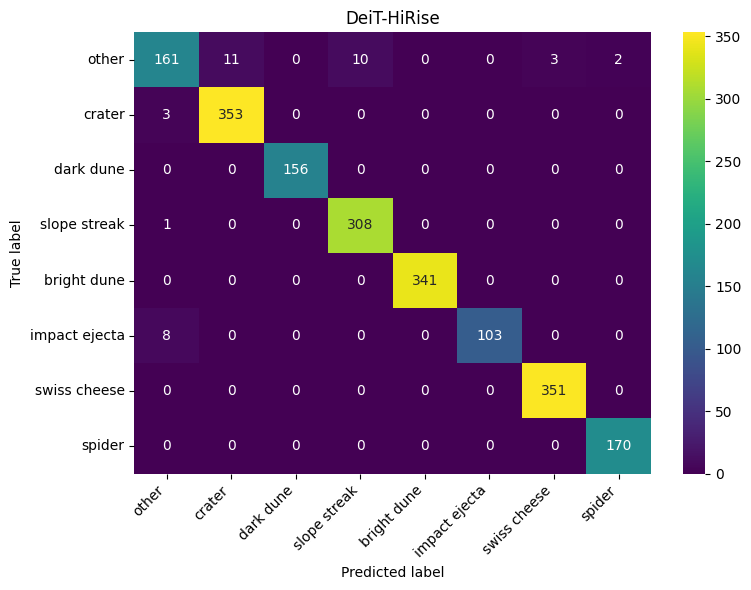

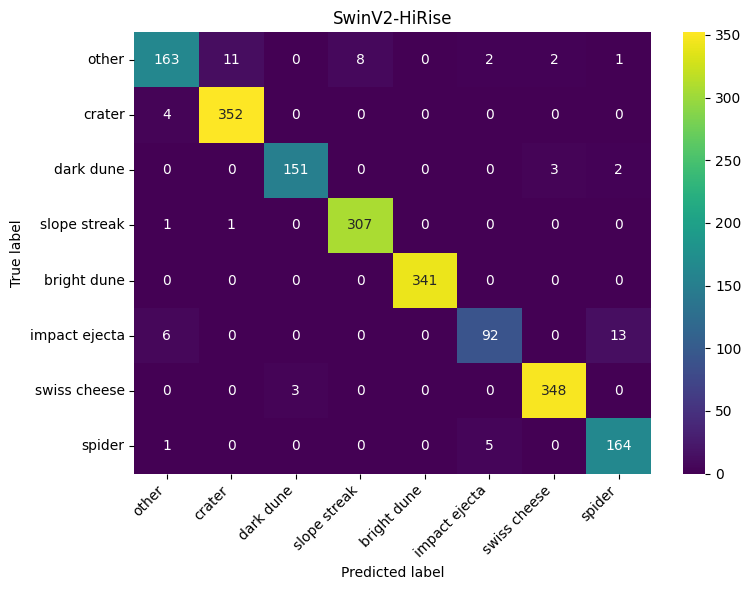

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class_names = ['other', 'crater', 'dark dune', 'slope streak',
               'bright dune', 'impact ejecta', 'swiss cheese', 'spider']

cm1_mat = np.array(model_metrics.loc['Model_1_Metrics', 'eval_confusion_matrix'])
cm2_mat = np.array(model_metrics.loc['Model_2_Metrics', 'eval_confusion_matrix'])
cm3_mat = np.array(model_metrics.loc['Model_3_Metrics', 'eval_confusion_matrix'])
cm4_mat = np.array(model_metrics.loc['Model_4_Metrics', 'eval_confusion_matrix'])
cm5_mat = np.array(model_metrics.loc['Model_5_Metrics', 'eval_confusion_matrix'])

matrices = [cm1_mat, cm2_mat, cm3_mat, cm4_mat, cm5_mat]

titles = Model_Name

for matrix, title in zip(matrices, titles):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt="d", cmap='viridis')
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.xticks(np.arange(len(class_names)) + 0.5, class_names, rotation=45, ha='right')
    plt.yticks(np.arange(len(class_names)) + 0.5, class_names, rotation=0)
    plt.tight_layout()
    plt.show()


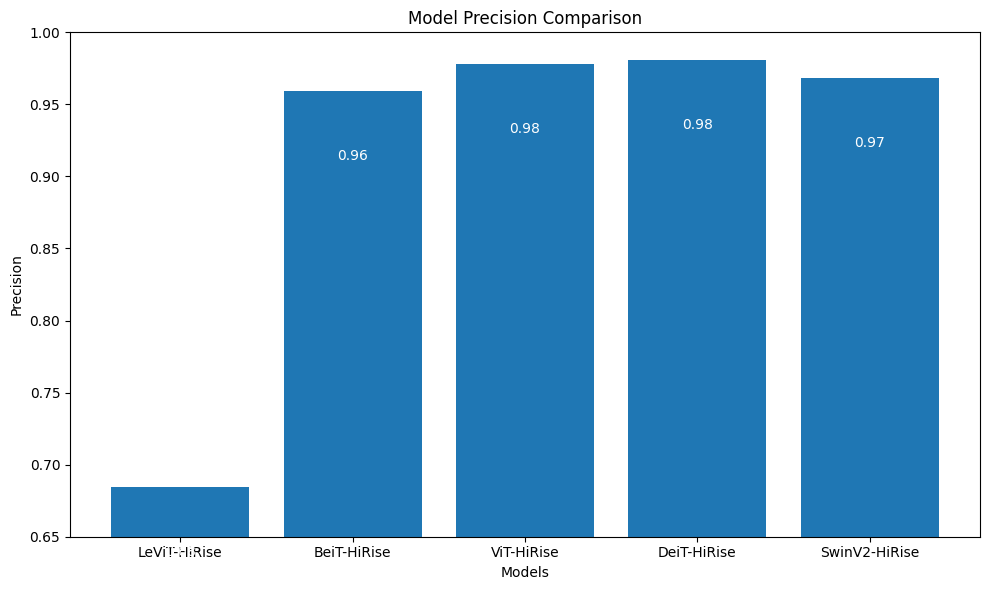

In [ ]:
import matplotlib.pyplot as plt

m1_pre = model_metrics.loc['Model_1_Metrics', 'eval_precision']
m2_pre = model_metrics.loc['Model_2_Metrics', 'eval_precision']
m3_pre = model_metrics.loc['Model_3_Metrics', 'eval_precision']
m4_pre = model_metrics.loc['Model_4_Metrics', 'eval_precision']
m5_pre = model_metrics.loc['Model_5_Metrics', 'eval_precision']
precision_values = [m1_pre,m2_pre,m3_pre,m4_pre,m5_pre]

plt.figure(figsize=(10, 6))
bars = plt.bar(Model_Name, precision_values)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 0.05, round(yval, 2), ha='center', va='bottom', color='white')

plt.title('Model Precision Comparison')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.ylim(0.65, 1)
plt.tight_layout()
plt.show()


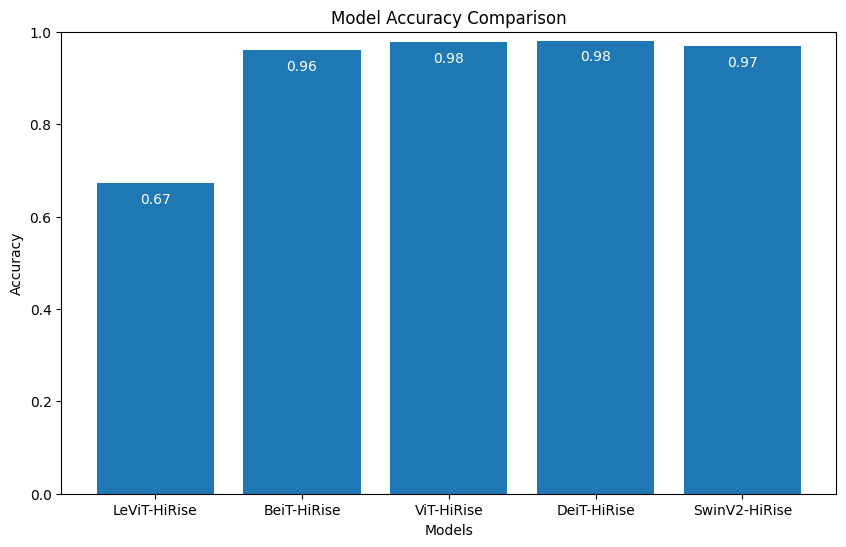

In [ ]:
import matplotlib.pyplot as plt

m1_pre = model_metrics.loc['Model_1_Metrics', 'eval_accuracy']
m2_pre = model_metrics.loc['Model_2_Metrics', 'eval_accuracy']
m3_pre = model_metrics.loc['Model_3_Metrics', 'eval_accuracy']
m4_pre = model_metrics.loc['Model_4_Metrics', 'eval_accuracy']
m5_pre = model_metrics.loc['Model_5_Metrics', 'eval_accuracy']
accuracy_values = [m1_pre,m2_pre,m3_pre,m4_pre,m5_pre]

plt.figure(figsize=(10, 6))
bars = plt.bar(Model_Name, accuracy_values)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 0.05, round(yval, 2), ha='center', va='bottom', color='white')

plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.ylim(0, 1)
plt.show()


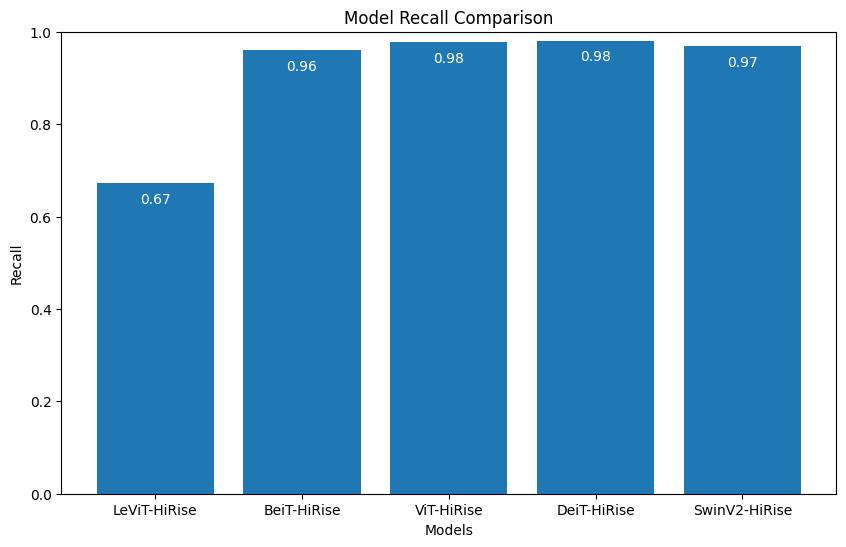

In [ ]:
import matplotlib.pyplot as plt

m1_pre = model_metrics.loc['Model_1_Metrics', 'eval_recall']
m2_pre = model_metrics.loc['Model_2_Metrics', 'eval_recall']
m3_pre = model_metrics.loc['Model_3_Metrics', 'eval_recall']
m4_pre = model_metrics.loc['Model_4_Metrics', 'eval_recall']
m5_pre = model_metrics.loc['Model_5_Metrics', 'eval_recall']
recall_values = [m1_pre,m2_pre,m3_pre,m4_pre,m5_pre]

plt.figure(figsize=(10, 6))
bars = plt.bar(Model_Name, recall_values)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 0.05, round(yval, 2), ha='center', va='bottom', color='white')

plt.title('Model Recall Comparison')
plt.xlabel('Models')
plt.ylabel('Recall')

plt.ylim(0, 1)
plt.show()


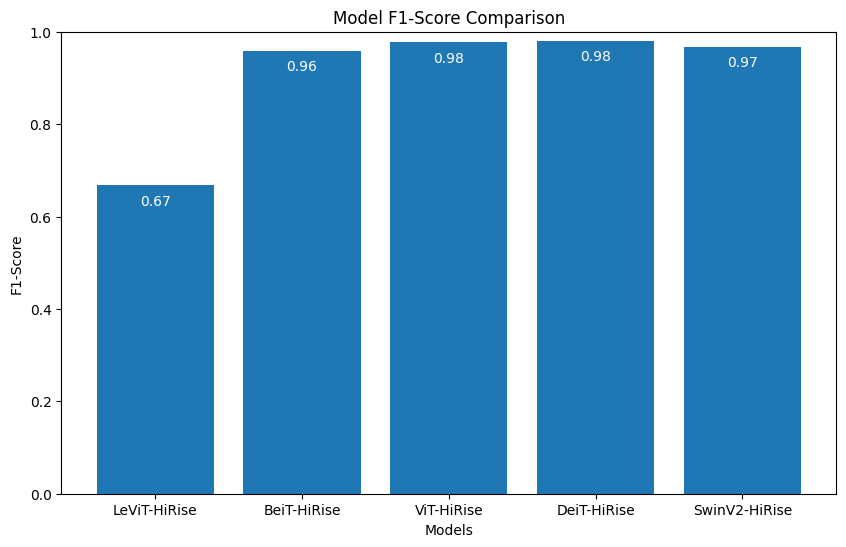

In [ ]:
import matplotlib.pyplot as plt

m1_pre = model_metrics.loc['Model_1_Metrics', 'eval_f1']
m2_pre = model_metrics.loc['Model_2_Metrics', 'eval_f1']
m3_pre = model_metrics.loc['Model_3_Metrics', 'eval_f1']
m4_pre = model_metrics.loc['Model_4_Metrics', 'eval_f1']
m5_pre = model_metrics.loc['Model_5_Metrics', 'eval_f1']
f1_values = [m1_pre,m2_pre,m3_pre,m4_pre,m5_pre]

plt.figure(figsize=(10, 6))
bars = plt.bar(Model_Name, f1_values)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 0.05, round(yval, 2), ha='center', va='bottom', color='white')

plt.title('Model F1-Score Comparison')
plt.xlabel('Models')
plt.ylabel('F1-Score')

plt.ylim(0, 1)
plt.show()
